In [7]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path

In [8]:
#Read path with Pandas
Polarbear_data = pd.read_csv('CS_SB_PBearMeasurementData_1981_2017.csv')
Polarbear_data

,Collecting_Agency,Population,Date,BearID,Sex,Age,Total_Length,Standard_Length,Heart_Girth,Skull_Width,...,Condition_Score,Number_of_cubs,Cub_Age,Gut_Fill,Litter_mass,Fat_In_Adipose,Gut_Fill_Obs,Snout_Vent_Length,Resistance,Percent_Body_Fat
0,USGS,SB,1982-04-09,1,M,17,218,no data,140,no data,...,2,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
1,USGS,SB,1986-05-04,1,M,21,240,219.4,149,24,...,2,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
2,USGS,SB,1987-04-21,1,M,22,238,216.4,129,24,...,3,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
3,USGS,SB,1987-04-06,2,F,18,212,196.5,127,22,...,4,0,NaN,no data,196.5,no data,no data,no data,no data,no data
4,USGS,SB,1981-10-19,2,F,12,198,no data,175,no data,...,4,2,C2,no data,no data,no data,no data,no data,no data,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,USGS,SB,2009-05-08,2290,F,10,226,199.2,124.7,20.3,...,3,0,NaN,no data,199.2,no data,no data,no data,no data,no data
3167,USGS,SB,2006-04-03,2291,F,13,227,200,125.3,21.5,...,3,1,C1,no data,200,no data,no data,no data,no data,no data
3168,USGS,SB,2006-04-03,2292,F,1,167,148,81.5,14.6,...,3,NaN,NaN,no data,NaN,no data,no data,no data,no data,no data
3169,USGS,SB,2016-04-22,2293,F,10,no data,201,124,20.5,...,3,0,NaN,no data,201,no data,no data,no data,no data,no data


In [9]:
# Get info on the Dataset
Polarbear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Collecting_Agency  3171 non-null   object
 1   Population         3171 non-null   object
 2   Date               3171 non-null   object
 3   BearID             3171 non-null   int64 
 4   Sex                3171 non-null   object
 5   Age                3171 non-null   object
 6   Total_Length       2703 non-null   object
 7   Standard_Length    3171 non-null   object
 8   Heart_Girth        3171 non-null   object
 9   Skull_Width        3171 non-null   object
 10  Tail_Length        3171 non-null   object
 11  Mass               3171 non-null   object
 12  Condition_Score    3171 non-null   object
 13  Number_of_cubs     994 non-null    object
 14  Cub_Age            610 non-null    object
 15  Gut_Fill           2836 non-null   object
 16  Litter_mass        880 non-null    object


In [10]:
cleaned_polarbear = Polarbear_data[['Date','BearID', 'Sex', 'Age', 'Mass', 'Total_Length','Number_of_cubs']]
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs
0,1982-04-09,1,M,17,267.6,218,NaN
1,1986-05-04,1,M,21,no data,240,NaN
2,1987-04-21,1,M,22,no data,238,NaN
3,1987-04-06,2,F,18,no data,212,0
4,1981-10-19,2,F,12,no data,198,2
...,...,...,...,...,...,...,...
3166,2009-05-08,2290,F,10,195.5,226,0
3167,2006-04-03,2291,F,13,no data,227,1
3168,2006-04-03,2292,F,1,no data,167,NaN
3169,2016-04-22,2293,F,10,202.3,no data,0


In [11]:
cleaned_polarbear = cleaned_polarbear.copy()
cleaned_polarbear['Date'] = pd.to_datetime(cleaned_polarbear['Date'])
cleaned_polarbear['year'] = cleaned_polarbear['Date'].dt.year
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1,M,17,267.6,218,NaN,1982
1,1986-05-04,1,M,21,no data,240,NaN,1986
2,1987-04-21,1,M,22,no data,238,NaN,1987
3,1987-04-06,2,F,18,no data,212,0,1987
4,1981-10-19,2,F,12,no data,198,2,1981
...,...,...,...,...,...,...,...,...
3166,2009-05-08,2290,F,10,195.5,226,0,2009
3167,2006-04-03,2291,F,13,no data,227,1,2006
3168,2006-04-03,2292,F,1,no data,167,NaN,2006
3169,2016-04-22,2293,F,10,202.3,no data,0,2016


In [12]:
# Convert 'Age', 'Mass', 'Total_Length', 'Number_of_cubs', and 'year' to float, turning 'no data' into NaN
cleaned_polarbear = cleaned_polarbear.copy()
cleaned_polarbear['Age'] = pd.to_numeric(cleaned_polarbear['Age'], errors='coerce')
cleaned_polarbear['Mass'] = pd.to_numeric(cleaned_polarbear['Mass'], errors='coerce')
cleaned_polarbear['Total_Length'] = pd.to_numeric(cleaned_polarbear['Total_Length'], errors='coerce')
cleaned_polarbear['Number_of_cubs'] = pd.to_numeric(cleaned_polarbear['Number_of_cubs'], errors='coerce')
cleaned_polarbear['year'] = pd.to_numeric(cleaned_polarbear['year'], errors='coerce')
cleaned_polarbear['BearID'] = pd.to_numeric(cleaned_polarbear['BearID'], errors='coerce')
cleaned_polarbear

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
0,1982-04-09,1,M,17.0,267.6,218.0,NaN,1982
1,1986-05-04,1,M,21.0,NaN,240.0,NaN,1986
2,1987-04-21,1,M,22.0,NaN,238.0,NaN,1987
3,1987-04-06,2,F,18.0,NaN,212.0,0.0,1987
4,1981-10-19,2,F,12.0,NaN,198.0,2.0,1981
...,...,...,...,...,...,...,...,...
3166,2009-05-08,2290,F,10.0,195.5,226.0,0.0,2009
3167,2006-04-03,2291,F,13.0,NaN,227.0,1.0,2006
3168,2006-04-03,2292,F,1.0,NaN,167.0,NaN,2006
3169,2016-04-22,2293,F,10.0,202.3,NaN,0.0,2016


In [13]:
# Handling Missing Values
#Drop rows with any missing values in 'Date', 'Sex', 'Number_of_cubs' or'Mass'
df_cleaned = cleaned_polarbear.dropna(subset=['Mass', 'Total_Length', 'year', 'Number_of_cubs'])
df_cleaned

,Date,BearID,Sex,Age,Mass,Total_Length,Number_of_cubs,year
5,1986-04-29,2,F,17.0,213.2,212.0,2.0,1986
7,1985-05-11,4,F,16.0,204.1,218.0,2.0,1985
11,1984-03-28,7,F,13.0,215.5,226.0,1.0,1984
12,1991-04-08,8,F,22.0,206.4,218.5,0.0,1991
13,1992-04-14,8,F,23.0,158.8,231.0,2.0,1992
...,...,...,...,...,...,...,...,...
3145,2010-04-14,2275,F,10.0,160.6,221.0,2.0,2010
3152,2010-04-12,2280,F,8.0,169.6,220.0,2.0,2010
3153,2011-04-02,2280,F,9.0,161.0,216.3,2.0,2011
3166,2009-05-08,2290,F,10.0,195.5,226.0,0.0,2009


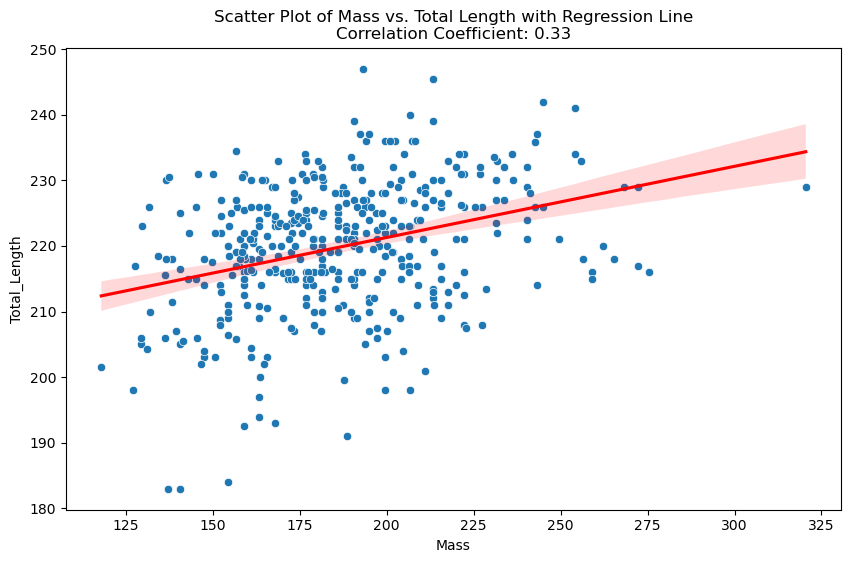

In [37]:
#Sample Graph
import seaborn as sns
import matplotlib.pyplot as plt


correlation_coefficient = df_cleaned['Mass'].corr(df_cleaned['Total_Length'])

# Now, create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mass', y='Total_Length', data=df_cleaned)
sns.regplot(x='Mass', y='Total_Length', data=df_cleaned, scatter=False, color='red')

# Add correlation coefficient to the plot
plt.title(f'Scatter Plot of Mass vs. Total Length with Regression Line\nCorrelation Coefficient: {correlation_coefficient:.2f}')

# Show the plot
plt.show()



C:\Users\nickn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


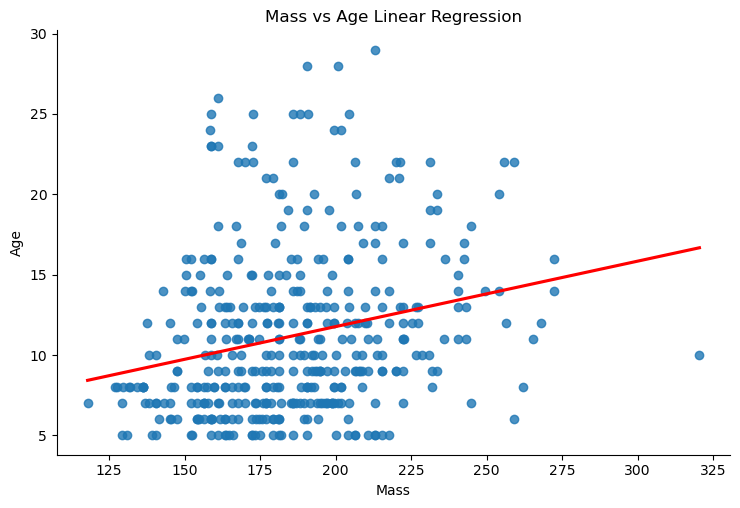

In [17]:
#Sample Graph # 2
import seaborn as sns
import matplotlib.pyplot as plt
df_cleaned=df_cleaned.copy()
# Create a scatter plot with a linear regression line
sns.lmplot(x='Mass', y='Age', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Mass vs Age Linear Regression')
plt.xlabel('Mass')
plt.ylabel('Age')

# Show the plot
plt.show()


C:\Users\nickn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


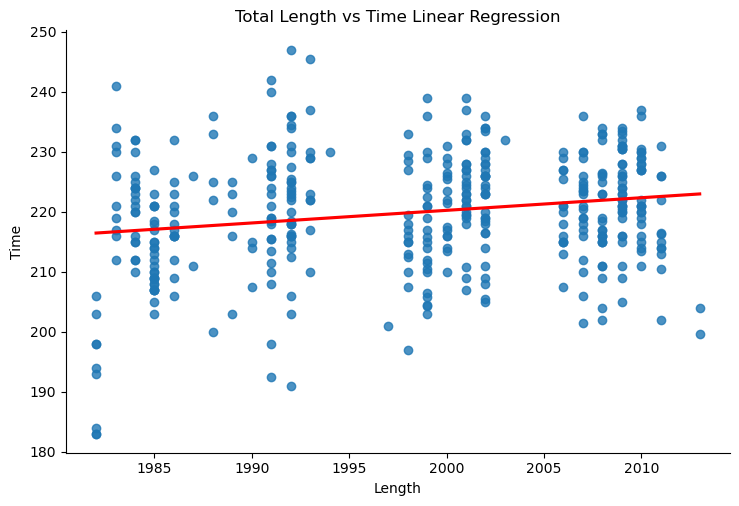

In [15]:
#Sample Graph # 3
import seaborn as sns
import matplotlib.pyplot as plt
df_cleaned=df_cleaned.copy()
# Create a scatter plot with a linear regression line
sns.lmplot(x='year', y='Total_Length', data=df_cleaned, aspect=1.5, ci=None, line_kws={'color': 'red'})

# Add title and labels
plt.title('Total Length vs Time Linear Regression')
plt.xlabel('Length')
plt.ylabel('Time')

# Show the plot
plt.show()

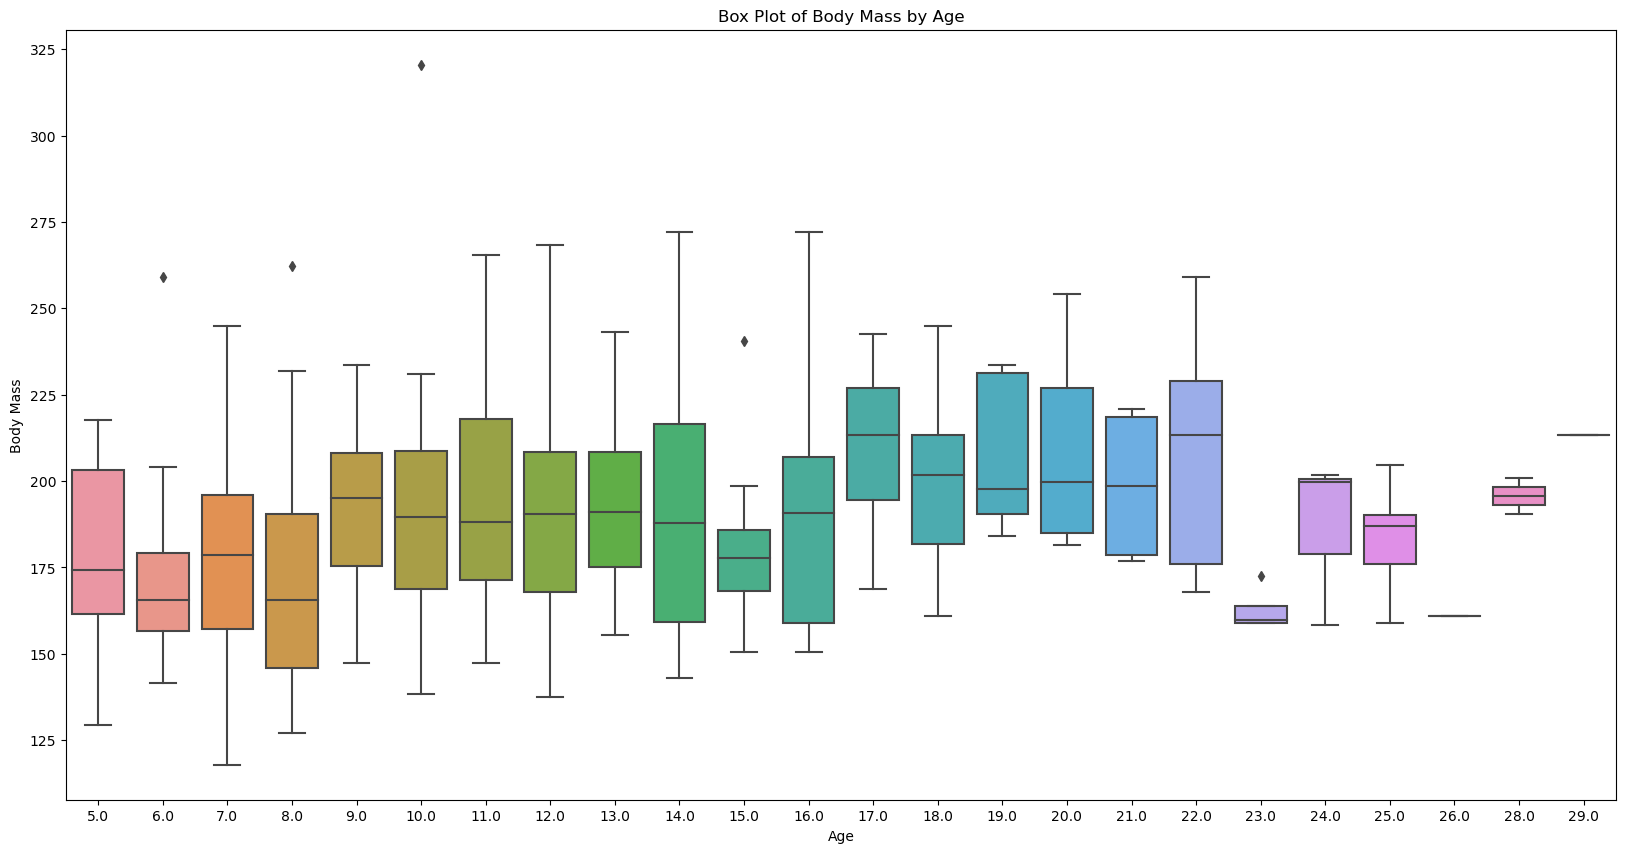

In [52]:
#Example of Boxplot
import seaborn as sns
import matplotlib.pyplot as plt



# Create a box plot of mass by sex and age
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age', y='Mass',  data=df_cleaned)

# Add title and labels
plt.title('Box Plot of Body Mass by Age')
plt.xlabel('Age')
plt.ylabel('Body Mass')

# Show the plot
plt.show()


In [31]:
df_2017_males.describe()
df_2017_females.describe()

,Date,BearID,Age,Mass,Total_Length,Number_of_cubs,year
count,1761,1761.000000,1751.000000,1203.000000,1268.000000,992.000000,1761.000000
mean,1999-03-06 12:30:39.863713664,1042.382169,6.973729,143.859435,192.775789,0.974798,1998.829642
min,1981-10-19 00:00:00,2.000000,0.000000,3.600000,54.000000,0.000000,1981.000000
25%,1988-11-10 00:00:00,483.000000,1.000000,86.300000,182.000000,0.000000,1988.000000
50%,2001-03-24 00:00:00,1034.000000,6.000000,163.600000,211.750000,1.000000,2001.000000
75%,2009-04-10 00:00:00,1563.000000,11.000000,197.300000,222.000000,2.000000,2009.000000
max,2017-04-20 00:00:00,2294.000000,30.000000,325.500000,247.000000,4.000000,2017.000000
std,NaN,645.279953,6.291708,76.233931,44.750282,0.893055,10.823084


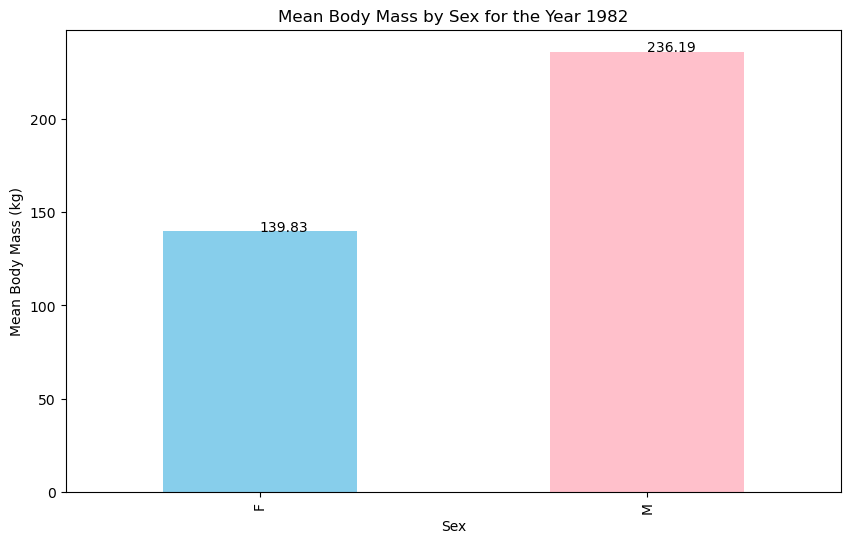

In [37]:
# Filter the DataFrame for the year 1982
df_1982 = cleaned_polarbear[cleaned_polarbear['year'] == 1982]

# Drop rows where 'Mass' is NaN 
df_1982 = df_1982.dropna(subset=['Mass'])

# Group by 'Sex' and calculate the mean 'Mass' for each group
mean_mass_by_sex = df_1982.groupby('Sex')['Mass'].mean()

# Now plot the mean mass by sex for 2017
plt.figure(figsize=(10, 6))

# Use a bar chart to display the mean mass for each sex
mean_mass_by_sex.plot(kind='bar', color=['skyblue', 'pink'])

# Add labels and title to the chart
plt.title('Mean Body Mass by Sex for the Year 1982')
plt.xlabel('Sex')
plt.ylabel('Mean Body Mass (kg)')

# Add value labels on top of the bars
for index, value in enumerate(mean_mass_by_sex):
    plt.text(index, value, f'{value:.2f}')

# Show the plot
plt.show()

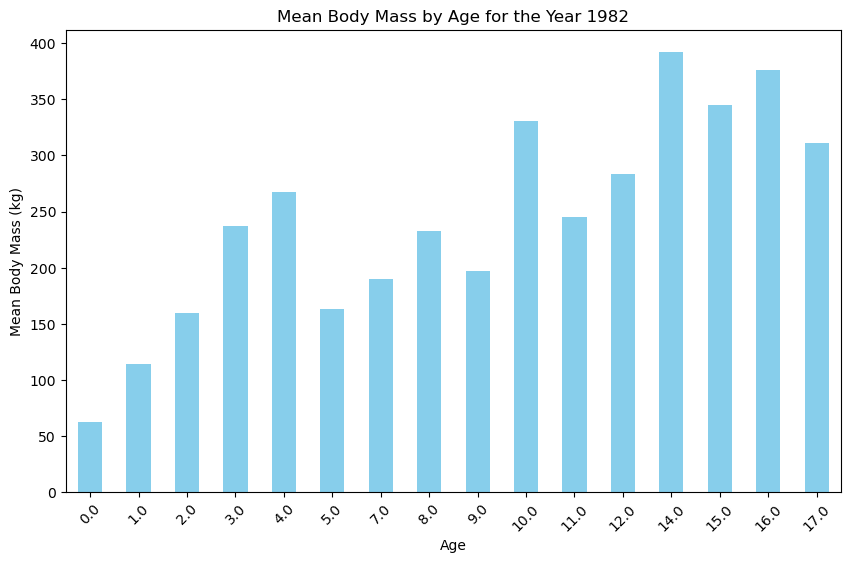

In [41]:
#Mean body mass by age at beginning of study

# Filter the DataFrame for the year 1982 and drop NaN values in 'Mass'
df_1982_age = cleaned_polarbear[(cleaned_polarbear['year'] == 1982) & cleaned_polarbear['Mass'].notna()]

# Group by 'Age' and calculate the mean 'Mass' for each age
mean_mass_by_age = df_1982_age.groupby('Age')['Mass'].mean()

# Now plot the mean mass by age for 1982
plt.figure(figsize=(10, 6))

# Use a bar chart to display the mean mass for each age
mean_mass_by_age.plot(kind='bar', color='skyblue')

# Add labels and title to the chart
plt.title('Mean Body Mass by Age for the Year 1982')
plt.xlabel('Age')
plt.ylabel('Mean Body Mass (kg)')

# Optionally, you can rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


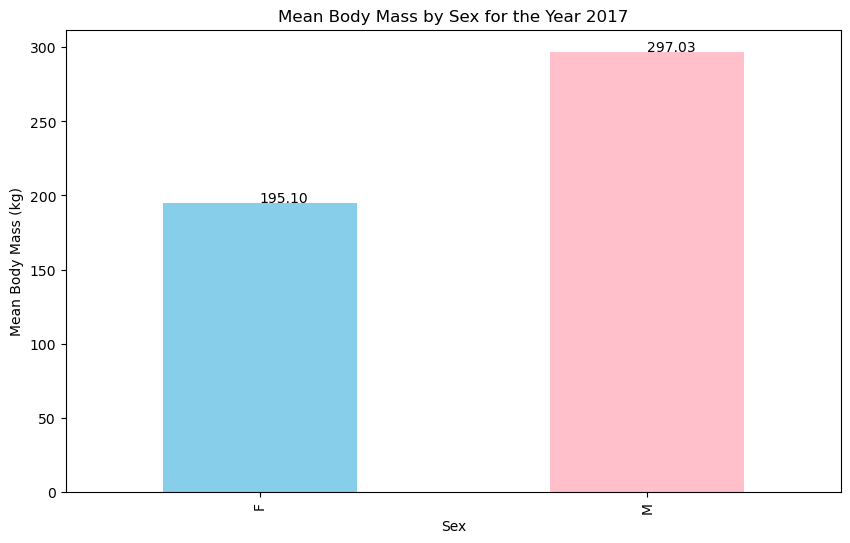

In [39]:


# Filter the DataFrame for the year 2017
df_2017 = cleaned_polarbear[cleaned_polarbear['year'] == 2017]

# Drop rows where 'Mass' is NaN 
df_2017 = df_2017.dropna(subset=['Mass'])

# Group by 'Sex' and calculate the mean 'Mass' for each group
mean_mass_by_sex = df_2017.groupby('Sex')['Mass'].mean()

# Now plot the mean mass by sex for 2017
plt.figure(figsize=(10, 6))

# Use a bar chart to display the mean mass for each sex
mean_mass_by_sex.plot(kind='bar', color=['skyblue', 'pink'])

# Add labels and title to the chart
plt.title('Mean Body Mass by Sex for the Year 2017')
plt.xlabel('Sex')
plt.ylabel('Mean Body Mass (kg)')

# Add value labels on top of the bars
for index, value in enumerate(mean_mass_by_sex):
    plt.text(index, value, f'{value:.2f}')

# Show the plot
plt.show()


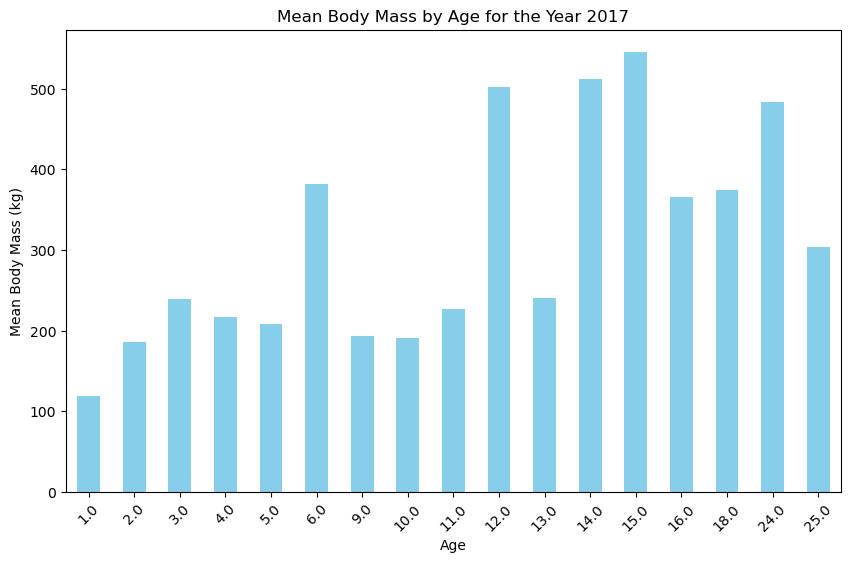

In [36]:
#Mean body mass by age at end of study

# Filter the DataFrame for the year 2017 and drop NaN values in 'Mass'
df_2017_age = cleaned_polarbear[(cleaned_polarbear['year'] == 2017) & cleaned_polarbear['Mass'].notna()]

# Group by 'Age' and calculate the mean 'Mass' for each age
mean_mass_by_age = df_2017_age.groupby('Age')['Mass'].mean()

# Now plot the mean mass by age for 2017
plt.figure(figsize=(10, 6))

# Use a bar chart to display the mean mass for each age
mean_mass_by_age.plot(kind='bar', color='skyblue')

# Add labels and title to the chart
plt.title('Mean Body Mass by Age for the Year 2017')
plt.xlabel('Age')
plt.ylabel('Mean Body Mass (kg)')

# Optionally, you can rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Distribution of Male vs. Female
Distribution of Female vs Female with Cubs

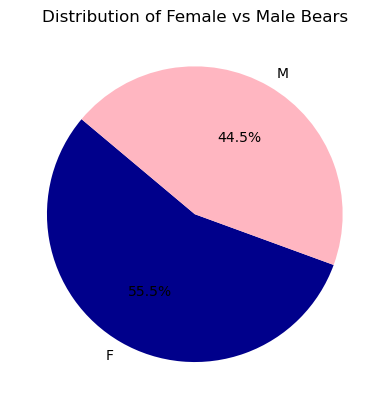

In [56]:
# Counting the number of female and male Bears
sex_distribution = cleaned_polarbear['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Males')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

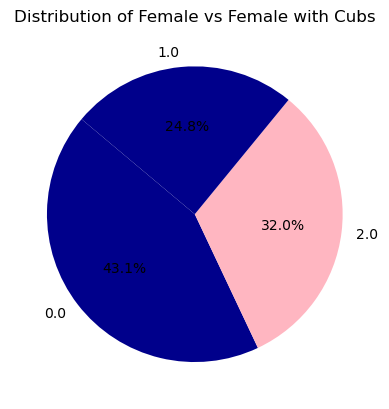

In [57]:
# Counting the number of female and females with cubs
sex_distribution = df_cleaned['Number_of_cubs'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Female with Cubs')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

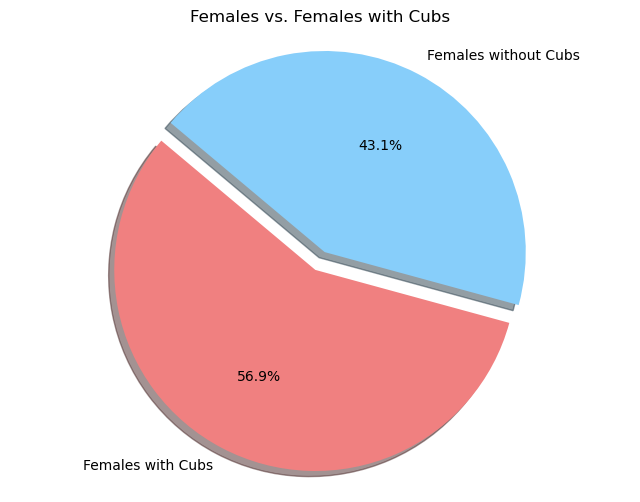

In [58]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Sex' and 'Number_of_cubs' columns
# Filter the DataFrame for only females
females = df_cleaned[df_cleaned['Sex'] == 'F']

# Determine the count of females without cubs and with cubs
females_with_cubs = females[females['Number_of_cubs'] > 0].shape[0]
females_without_cubs = females[females['Number_of_cubs'] == 0].shape[0]

# Data to plot
labels = 'Females with Cubs', 'Females without Cubs'
sizes = [females_with_cubs, females_without_cubs]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Females vs. Females with Cubs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


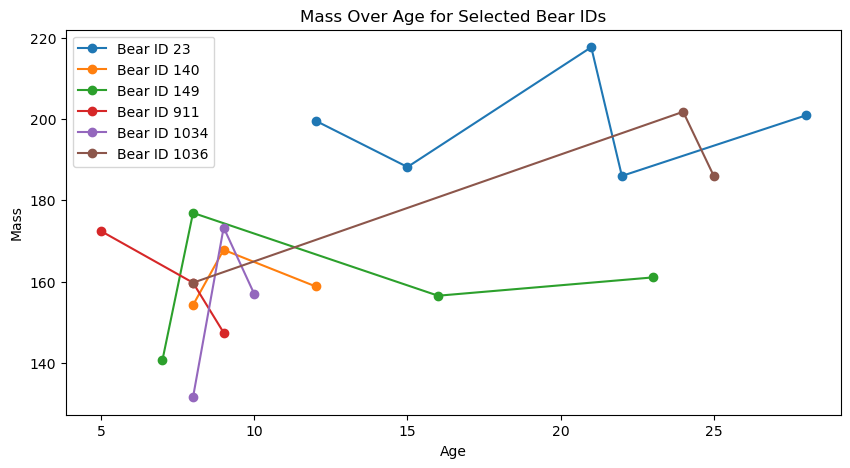

In [69]:
#Line plot age vs Mass
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
selected_bear_ids = [23, 140, 149, 911, 1034, 1036,]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('Age')

# Plotting 'Year' vs 'Mass' for each Bear ID
plt.figure(figsize=(10,5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['Age'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Adding title and labels
plt.title('Mass Over Age for Selected Bear IDs')
plt.xlabel('Age')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()


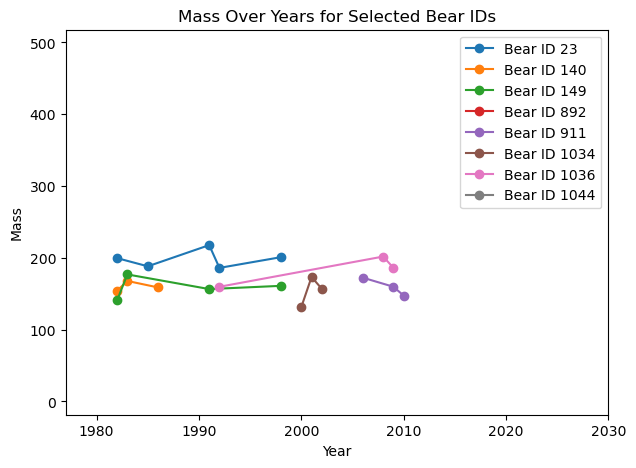

In [65]:
import matplotlib.pyplot as plt


selected_bear_ids = [23, 140, 149, 911, 1034, 1036, 1044]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Sort the DataFrame by year to ensure the line plot makes sense
selected_bears_sorted = selected_bears.sort_values('year')

# Increase the figure size for better visibility
plt.figure(figsize=(7, 5))

for bear_id in selected_bear_ids:
    # Extract data for each Bear ID
    bear_data = selected_bears_sorted[selected_bears_sorted['BearID'] == bear_id]
    # Plotting the data with year on the x-axis and mass on the y-axis
    plt.plot(bear_data['year'], bear_data['Mass'], marker='o', linestyle='-', label=f'Bear ID {bear_id}')

# Expand the x and y limits if needed to include more data
plt.xlim(min(selected_bears_sorted['year']) - 5, max(selected_bears_sorted['year']) + 20)
plt.ylim(min(selected_bears_sorted['Mass']) - 150, max(selected_bears_sorted['Mass']) + 300)

# Adding title and labels
plt.title('Mass Over Years for Selected Bear IDs')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.legend()

# Show the plot
plt.show()


In [70]:
#Statistical Summary:  

stats_summary = df_cleaned['Mass'].describe()
mean = df_cleaned['Mass'].mean()
median = df_cleaned['Mass'].median()
mode = df_cleaned['Mass'].mode()[0]  # mode() returns a Series, take the first value

print(f"Mean: {mean}\nMedian: {median}\nMode: {mode}")
print(stats_summary)


Mean: 186.23445783132527
Median: 182.3
Mode: 181.4
count    415.000000
mean     186.234458
std       30.203155
min      117.900000
25%      163.300000
50%      182.300000
75%      204.100000
max      320.500000
Name: Mass, dtype: float64


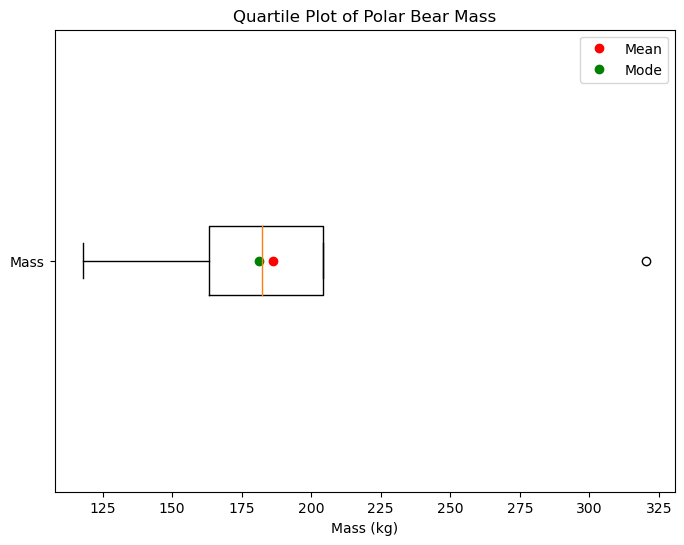

In [4]:
import matplotlib.pyplot as plt
# Define the quartiles, median, and whiskers from the data provided
Q1 = 163.3
median = 182.3
Q3 = 204.1
min_val = 117.9
max_val = 320.5

# Create a figure and a subplot
plt.figure(figsize=(8, 6))
ax = plt.subplot()
# Plot the mean and mode
mean_val = 186.234458
mode_val = 181.4

plt.plot(mean_val, 1, 'o', color='red', label='Mean')
plt.plot(mode_val, 1, 'o', color='green', label='Mode')

# Add a legend to the plot
plt.legend()


# Plot the box plot using the quartile values
ax.boxplot([min_val, Q1, median, Q3, max_val], vert=False)

# Set the labels and title
ax.set_yticklabels(['Mass'])
plt.title('Quartile Plot of Polar Bear Mass')
plt.xlabel('Mass (kg)')

# Show the plot
plt.show()

In [73]:
quantiles =df_cleaned['Mass'].quantile([0.25, 0.5, 0.75])
print(f"Quantiles:\n{quantiles}")

Quantiles:
0.25    163.3
0.50    182.3
0.75    204.1
Name: Mass, dtype: float64


In [74]:
# Calculate IQR for 'Mass'
Q1 = df_cleaned['Mass'].quantile(0.25)
Q3 = df_cleaned['Mass'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['Mass'] < (Q1 - 1.5 * IQR)) | (df_cleaned['Mass'] > (Q3 + 1.5 * IQR))]
print(f"Outliers:\n{outliers}")


Outliers:
           Date  BearID Sex   Age   Mass  Total_Length  Number_of_cubs  year
544  1986-05-09     377   F  16.0  272.2         217.0             0.0  1986
803  1990-03-02     583   F  10.0  320.5         229.0             2.0  1990
978  1993-02-27     729   F  12.0  268.2         229.0             1.0  1993
1168 2006-05-08     894   F  14.0  272.2         229.0             0.0  2006
1506 2001-03-30    1104   F  11.0  265.4         218.0             0.0  2001
1556 2008-10-15    1125   F   NaN  275.3         216.0             0.0  2008


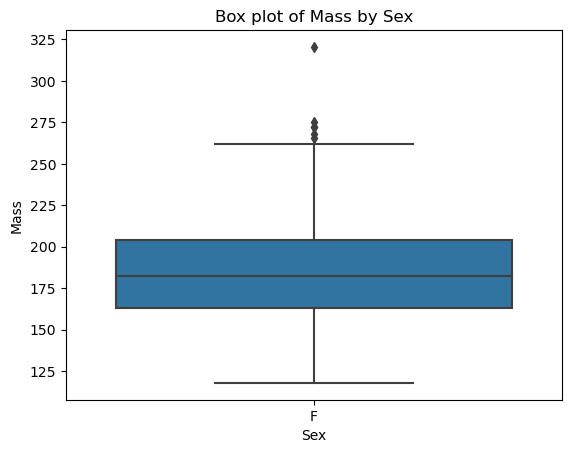

In [76]:
#Scatter plot with regression line
import seaborn as sns

sns.boxplot(x='Sex', y='Mass', data=df_cleaned)
plt.title('Box plot of Mass by Sex')
plt.show()


In [78]:
# Null Hypothesis Testing: Relationship between mass and year/age. 
#Perform a statistical test, such as Pearson's correlation for linear relationships.
from scipy import stats


correlation, p_value = stats.pearsonr(df_cleaned['year'], df_cleaned['Mass'])  # Replace 'Year' with 'Age' if necessary
print(f"Correlation coefficient: {correlation}\nP-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("We reject the null hypothesis of no relationship between mass and year/age.")
else:
    print("We do not reject the null hypothesis of no relationship between mass and year/age.")



Correlation coefficient: 0.014271627096601047
P-value: 0.771913407896739
We do not reject the null hypothesis of no relationship between mass and year/age.


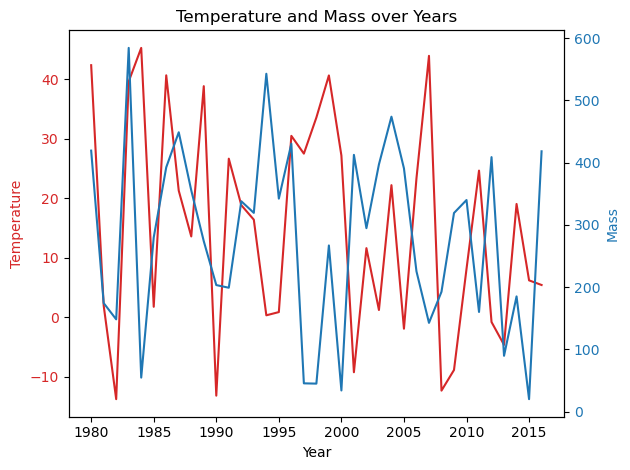

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

BeaufortSea_Temp_data = pd.read_csv('Beaufort_Sea_Temperatures.csv')

# Sample data: replace with your actual data
years = range(1980, 2017)
temperature = [random.uniform(-20, 50) for _ in years]  
mass = [random.uniform(0, 600) for _ in years]  # Replace with your actual mass data

# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot the temperature data on the first axis
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature', color=color)
ax1.plot(years, temperature, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second axis sharing the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Mass', color=color)  # we already handled the x-label with ax1
ax2.plot(years, mass, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title of the plot
plt.title('Temperature and Mass over Years')

# Show the plot
fig.tight_layout()  # To ensure the right y-label is not clipped
plt.show()


Statistical Summary

In [29]:
df_cleaned=df_cleaned.copy()
# Group by 'year' and calculate mean, median, variance, std, and SEM for body mass
mass_summary_by_year = df_cleaned.groupby('year')['Mass'].agg(['mean', 'median', 'var', 'std'])

# Calculate SEM separately since it requires a different function
mass_summary_by_year['sem'] = df_cleaned.groupby('year')['Mass'].apply(lambda x: st.sem(x, nan_policy='omit'))

# Rename the columns 
mass_summary_by_year.columns = ['Mean', 'Median', 'Variance', 'StandardDeviation', 'SEM']

# Put it into a DataFrame
mass_summary_df = mass_summary_by_year.copy()

# Display the resulting DataFrame
print(mass_summary_df)

            Mean  Median     Variance  StandardDeviation        SEM
year                                                               
1982  160.866667  161.00   631.677500          25.133195   8.377732
1983  196.630000  192.75  1325.033444          36.401009  11.511010
1984  191.100000  190.50   572.601111          23.929085   5.489709
1985  185.796552  181.40   684.956059          26.171665   4.859956
1986  194.964286  185.95  1553.820934          39.418535  10.535047
1987  220.450000  220.45    93.845000           9.687363   6.850000
1988  202.260000  202.30   914.608000          30.242487  13.524851
1989  184.180000  186.00   139.642000          11.817022   5.284733
1990  252.850000  240.90  2479.556667          49.795147  24.897574
1991  185.696000  186.00   868.022067          29.462214   5.892443
1992  171.867742  172.70   525.220258          22.917684   4.116138
1993  184.950000  177.25  2168.462778          46.566756  14.725701
1994  181.800000  181.80          NaN           

C:\Users\nickn\anaconda3\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\nickn\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [30]:
# Define the year bins
year_bins = [1981, 1990, 2000, 2010, 2018]  # Adjust the bin edges as needed

# Create a new column 'YearBin' to represent the bins
df_cleaned['YearBin'] = pd.cut(df_cleaned['year'], bins=year_bins, labels=['1981-1989', '1990-1999', '2000-2009', '2010-2017'])

# Group by 'YearBin' and calculate mean, median, variance, std, and SEM for body mass
mass_summary_by_year_bin = df_cleaned.groupby('YearBin')['Mass'].agg(['mean', 'median', 'var', 'std'])

# Calculate SEM separately since it requires a different function
mass_summary_by_year_bin['sem'] = df_cleaned.groupby('YearBin')['Mass'].apply(lambda x: st.sem(x, nan_policy='omit'))

# Reset index to make the resulting DataFrame more readable
mass_summary_by_year_bin = mass_summary_by_year_bin.reset_index()

# Rename the columns for clarity
mass_summary_by_year_bin.columns = ['YearBin', 'Mean', 'Median', 'Variance', 'StandardDeviation', 'SEM']

# Display the resulting DataFrame
print(mass_summary_by_year_bin)

     YearBin        Mean  Median     Variance  StandardDeviation       SEM
0  1981-1989  191.207216  186.00  1102.152760          33.198686  3.370816
1  1990-1999  179.678689  178.05   828.920699          28.790983  2.606613
2  2000-2009  188.132967  188.20   822.368962          28.676976  2.125679
3  2010-2017  184.228571  181.00  1104.177582          33.229168  8.880869


In [31]:
# Count the number of unique Bear IDs
unique_bear_ids_count = df_cleaned['BearID'].nunique()

# Display the result
print(f"Number of Unique Bear IDs: {unique_bear_ids_count}")

Number of Unique Bear IDs: 297


In [32]:
# Group by 'BearID' and calculate the number of unique years for each Bear ID
years_analyzed_per_bear = df_cleaned.groupby('BearID')['year'].nunique()

# Convert the result to a DataFrame for better representation
years_analyzed_df = pd.DataFrame({'BearID': years_analyzed_per_bear.index, 'Years_Analyzed': years_analyzed_per_bear.values})

# Display the resulting DataFrame
print(years_analyzed_df)

     BearID  Years_Analyzed
0         2               1
1         4               1
2         7               1
3         8               2
4         9               1
..      ...             ...
292    2271               2
293    2275               1
294    2280               2
295    2290               1
296    2294               1

[297 rows x 2 columns]


In [33]:
# Group by 'BearID' and count the number of unique years for each Bear ID
years_analyzed_per_bear = df_cleaned.groupby('BearID')['year'].nunique()

# Filter Bear IDs that were analyzed for at least 3 years
bear_ids_analyzed_at_least_3_years = years_analyzed_per_bear[years_analyzed_per_bear >= 3]

# Count the number of unique Bear IDs that meet the condition
unique_bear_ids_analyzed_at_least_3_years = bear_ids_analyzed_at_least_3_years.count()

# Display the result
print(f"Number of Unique Bear IDs Analyzed at Least 3 Years: {unique_bear_ids_analyzed_at_least_3_years}")

Number of Unique Bear IDs Analyzed at Least 3 Years: 24


In [34]:
# Group by 'BearID' and count the number of unique years for each Bear ID
years_analyzed_per_bear = df_cleaned.groupby('BearID')['year'].nunique()

# Filter Bear IDs that were analyzed for at least 3 years
bear_ids_analyzed_at_least_3_years = years_analyzed_per_bear[years_analyzed_per_bear >= 3]

# Print out each Bear ID that was analyzed at least 3 years
print("Bear IDs Analyzed at Least 3 Years:")
print(bear_ids_analyzed_at_least_3_years.index)

Bear IDs Analyzed at Least 3 Years:
Index([  23,   44,   96,  134,  140,  149,  281,  382,  385,  517,  911,  969,
       1034, 1036, 1056, 1099, 1100, 1116, 1122, 1125, 1137, 1151, 1156, 1162],
      dtype='int64', name='BearID')


In [35]:
# List of 24 selected Bear IDs
selected_bear_ids = [23, 44.0,   96.0,  134.0,  140.0,  149.0,  281.0,  382.0,  385.0,
        517.0,  911.0,  969.0, 1034.0, 1036.0, 1056.0, 1099.0, 1100.0, 1116.0,
       1122.0, 1125.0, 1137.0, 1151.0, 1156.0, 1162.0]

# Filter the DataFrame to include only the selected Bear IDs
selected_bears = df_cleaned[df_cleaned['BearID'].isin(selected_bear_ids)]

# Calculate the average body mass for each Bear ID
average_mass_per_bear = selected_bears.groupby('BearID')['Mass'].mean().reset_index()

# Print results
print(average_mass_per_bear)

    BearID        Mass
0       23  198.480000
1       44  223.766667
2       96  188.800000
3      134  165.866667
4      140  160.266667
5      149  158.750000
6      281  193.550000
7      382  211.000000
8      385  192.300000
9      517  203.833333
10     911  159.833333
11     969  200.966667
12    1034  153.900000
13    1036  182.500000
14    1056  189.928571
15    1099  211.925000
16    1100  181.900000
17    1116  170.450000
18    1122  183.400000
19    1125  213.333333
20    1137  158.733333
21    1151  174.075000
22    1156  194.566667
23    1162  173.100000


In [37]:
# Group by 'year' and 'Sex', and calculate the average mass for each group
average_mass_by_year_sex = cleaned_polarbear.groupby(['year', 'Sex'])['Mass'].mean().reset_index()

# Print the resulting DataFrame
print(average_mass_by_year_sex)

    year Sex        Mass
0   1981   F         NaN
1   1981   M         NaN
2   1982   F  139.829167
3   1982   M  236.194118
4   1983   F  171.540541
..   ...  ..         ...
67  2015   M  313.501852
68  2016   F  204.592683
69  2016   M  293.727083
70  2017   F  195.095238
71  2017   M  297.033333

[72 rows x 3 columns]


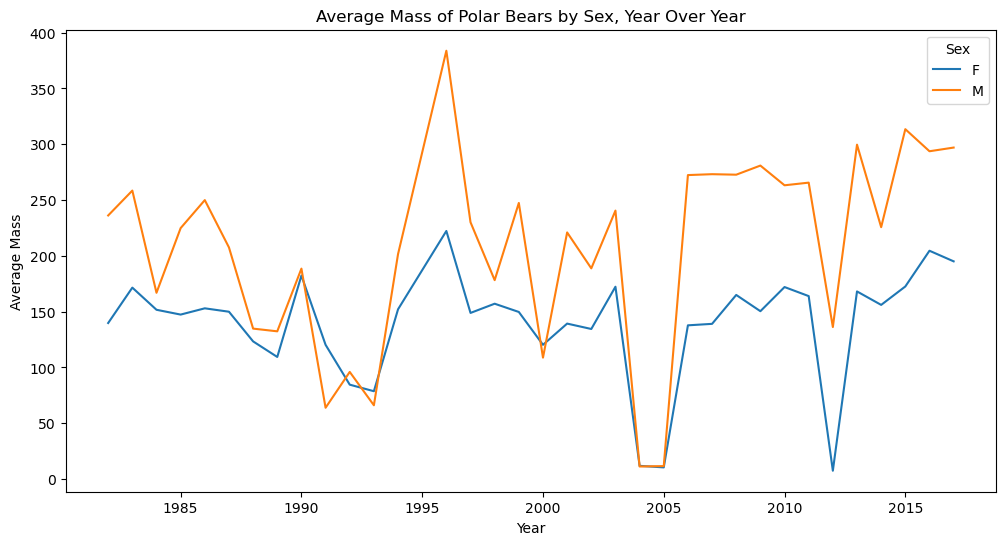

In [38]:
# Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Mass', hue='Sex', data=average_mass_by_year_sex)
plt.title('Average Mass of Polar Bears by Sex, Year Over Year')
plt.xlabel('Year')
plt.ylabel('Average Mass')
plt.legend(title='Sex')
plt.show()

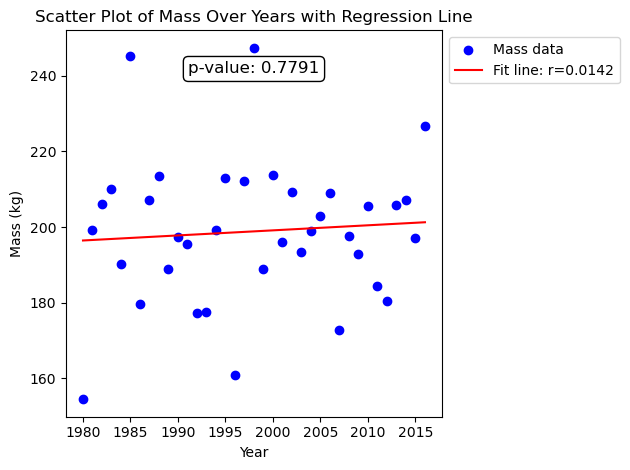

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for plotting
years = np.array(range(1980, 2017))  # Example year data
mass = np.random.normal(200, 20, len(years))  # Randomly generated mass data

# correlation coefficient and p-value from analysis above
correlation_coefficient = 0.0142
p_value = 0.7791

# Create a scatter plot
plt.scatter(years, mass, label='Mass data', color='blue')

# Fit a simple linear regression line to the data
m, b = np.polyfit(years, mass, 1)
plt.plot(years, m*years + b, color='red', label=f'Fit line: r={correlation_coefficient:.4f}')

# Annotate the plot with the p-value
# Position the annotation within the plot frame, adjusting the y-position so it does not overlap with the points
plt.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12,
             ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Add titles and labels
plt.title('Scatter Plot of Mass Over Years with Regression Line')
plt.xlabel('Year')
plt.ylabel('Mass (kg)')

# Place the legend outside of the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()